In [1]:
# Notes for office hours: 

#OVERALL I HAVE THIS PROBLEM WHERE A BUNCH OF MY COLUMNS ARE THE WRONG DATA TYPE (RELEASE DATE IS A FLOAT AND WRITTEN WEIRD)
# AND BUGET AND COLLECTION ARE STRINGS INSTEAD OF INTEGERS 
# WHAT DO I DO? 
# (even when I create different data frames they are still the wrong data type)

In [2]:
# import all the important stuff
import numpy as np 
import pandas as pd 
import seaborn as sb 
import re
%matplotlib inline
pd.options.display.max_columns=200

import requests 
import pprint
from datetime import datetime


In [3]:
# read in the IMDB CSV 
IMDBData=pd.read_csv("IMDB data marvel movies.csv")
IMDBData

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN
5,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551",NaN
6,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,",20 May 2019
7,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man (2008) - IMDb,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,",2 October 2008
8,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor (2011) - IMDb,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618",NaN
9,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War (2016) - IMDb,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss...,English|German|Xhosa|Russian|Romanian|Hindi,"Atlanta, Georgia, USA","$250,000,000","$1,153,304,495",NaN


In [4]:
IMDBData.drop([0], inplace = True) # delete GOTG vol 3 because it hasn't come out yet 
# and will mess up the data

In [5]:
IMDBData

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN
5,1b678fd492c4e7e9670d9821771d4969,2019-05-29 12:30:25 +0000,https://www.imdb.com/title/tt0800080/,The Incredible Hulk (2008) - IMDb,Action|Adventure|Sci-Fi,13 June 2008 (USA),PG-13,6.7,112 min,Directed by Louis Leterrier. With Edward Norto...,Edward Norton|Liv Tyler|Tim Roth|William Hurt,English|Portuguese|Spanish,"Cherry Street Bridge, Toronto, Ontario, Canada","$150,000,000","$263,427,551",NaN
6,430d1d4ab49d0606c260e17b0dc0bb93,2019-05-29 12:31:49 +0000,https://www.imdb.com/title/tt4154664/,Captain Marvel (2019) - IMDb,Action|Adventure|Sci-Fi,8 March 2019 (USA),PG-13,7.1,123 min,"Directed by Anna Boden, Ryan Fleck. With Brie ...",Brie Larson|Samuel L. Jackson|Ben Mendelsohn|J...,English,"Los Angeles, California, USA",NaN,"$1,126,318,317,",20 May 2019
7,c71e93e0f4eb6e5cd73137f051262007,2019-05-29 12:30:21 +0000,https://www.imdb.com/title/tt0371746/,Iron Man (2008) - IMDb,Action|Adventure|Sci-Fi,2 May 2008 (USA),PG-13,7.9,126 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Gwyneth Paltrow|Terrence How...,English|Persian|Urdu|Arabic|Hungarian,"Palmdale Regional Airport, Palmdale, Californi...","$140,000,000","$585,174,222,",2 October 2008
8,f59d540280f7a915c1823908ff695e14,2019-05-29 12:30:38 +0000,https://www.imdb.com/title/tt0800369/,Thor (2011) - IMDb,Action|Adventure|Fantasy|Sci-Fi,6 May 2011 (USA),PG-13,7.0,115 min,Directed by Kenneth Branagh. With Chris Hemswo...,Chris Hemsworth|Anthony Hopkins|Natalie Portma...,English,"Galisteo, New Mexico, USA","$150,000,000","$449,326,618",NaN
9,26f5c6056bfbbfe50d427cd97845c899,2019-05-29 12:31:19 +0000,https://www.imdb.com/title/tt3498820/,Captain America: Civil War (2016) - IMDb,Action|Adventure|Sci-Fi,6 May 2016 (USA),PG-13,7.8,147 min,"Directed by Anthony Russo, Joe Russo. With Chr...",Chris Evans|Robert Downey Jr.|Scarlett Johanss...,English|German|Xhosa|Russian|Romanian|Hindi,"Atlanta, Georgia, USA","$250,000,000","$1,153,304,495",NaN
10,e0a83f59b045382ec6c1ba15d433e6ac,2019-05-29 12:31:57 +0000,https://www.imdb.com/title/tt6320628/,Spider-Man: Far from Home (2019) - IMDb,NaN,2 July 2019 (USA),NaN,NaN,NaN,"Directed by Jon Watts. With Zendaya, Tom Holla...",NaN,English,"Hertfordshire, England, UK",NaN,NaN,NaN


In [6]:
### NOTES FROM DR. ZEITZ #######
# IMDBData["Release Date"].astype(str).apply(lambda x:x[0:-7]).to_datetime("%d %B %Y")
# first convert data from float to string
# then use apply to remove last 7 characters which are (USA) preceded by a space

# do a to_dateime after the .apply to convert series to datetime
# IMDBData["ReleaseDateDatetime"] = your code to convert date column
#IMDBData["ReleaseDateDatetime"] = IMDBData["Release Date"].astype(str).apply(lambda x:x[0:-7]).dt.strftime("%d %B %Y")
# .datetime doesn't work on a series object tho, so try something else? 

In [10]:
#date_dt1 = datetime.strptime(IMDBData["Release Date"].astype(str).apply(lambda x:x[0:-7])[1], '%d %B %Y')
#print(date_dt1)


# so if I use a for loop, I can create a new column with all of them printed like this 

for i in range (1, len(IMDBData)):
    print(datetime.strptime(IMDBData["Release Date"].astype(str).apply(lambda x:x[0:-7])[i], '%d %B %Y'))
    # so this line can sometimes run an error, if that happens delete the [i] after IMDBData["Release Date Datetime"] and run it, 
    # then add it back in and run it again 
    IMDBData["Release Date Datetime"][i]=datetime.strptime(IMDBData["Release Date"].astype(str).apply(lambda x:x[0:-7])[i], '%d %B %Y')

2010-05-07 00:00:00
2014-08-01 00:00:00
2018-02-16 00:00:00
2013-05-03 00:00:00
2008-06-13 00:00:00
2019-03-08 00:00:00
2008-05-02 00:00:00
2011-05-06 00:00:00
2016-05-06 00:00:00
2019-07-02 00:00:00
2018-04-27 00:00:00
2017-07-07 00:00:00
2011-07-22 00:00:00
2019-04-26 00:00:00
2018-07-06 00:00:00
2015-07-17 00:00:00
2013-11-08 00:00:00
2014-04-04 00:00:00
2015-05-01 00:00:00
2017-05-05 00:00:00
2017-11-03 00:00:00
2016-11-04 00:00:00


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
IMDBData["Release Date Datetime"] # so now I have the dates the way I need it 

1    2010-05-07
2    2014-08-01
3    2018-02-16
4    2013-05-03
5    2008-06-13
6    2019-03-08
7    2008-05-02
8    2011-05-06
9    2016-05-06
10   2019-07-02
11   2018-04-27
12   2017-07-07
13   2011-07-22
14   2019-04-26
15   2018-07-06
16   2015-07-17
17   2013-11-08
18   2014-04-04
19   2015-05-01
20   2017-05-05
21   2017-11-03
22   2016-11-04
23   2016-11-04
Name: Release Date Datetime, dtype: datetime64[ns]

In [12]:
# now let's sort the movies by release date 
IMDBData[["Title","Release Date Datetime","Review Rating"]].sort_values("Release Date Datetime", ascending=True)
# what if I wanted to group them by year and graph them for scores? 

,Title,Release Date Datetime,Review Rating
7,Iron Man (2008) - IMDb,2008-05-02,7.9
5,The Incredible Hulk (2008) - IMDb,2008-06-13,6.7
1,Iron Man 2 (2010) - IMDb,2010-05-07,7.0
8,Thor (2011) - IMDb,2011-05-06,7.0
13,Captain America: The First Avenger (2011) - IMDb,2011-07-22,6.9
4,Iron Man 3 (2013) - IMDb,2013-05-03,7.2
17,Thor: The Dark World (2013) - IMDb,2013-11-08,6.9
18,Captain America: The Winter Soldier (2014) - IMDb,2014-04-04,7.8
2,Guardians of the Galaxy (2014) - IMDb,2014-08-01,8.1
19,Avengers: Age of Ultron (2015) - IMDb,2015-05-01,7.3


In [13]:
# this finds the average review ratings for each year 
GroupByYearNew=IMDBData.groupby(IMDBData["Release Date Datetime"].dt.year).agg({"Review Rating":np.mean}).sort_values("Review Rating",ascending=False)
GroupByYearNew=GroupByYearNew.reset_index()

   Release Date Datetime  Review Rating
0                   2019       7.950000
1                   2014       7.950000
2                   2016       7.800000
3                   2017       7.700000
4                   2018       7.633333
5                   2008       7.300000
6                   2015       7.300000
7                   2013       7.050000
8                   2010       7.000000
9                   2011       6.950000


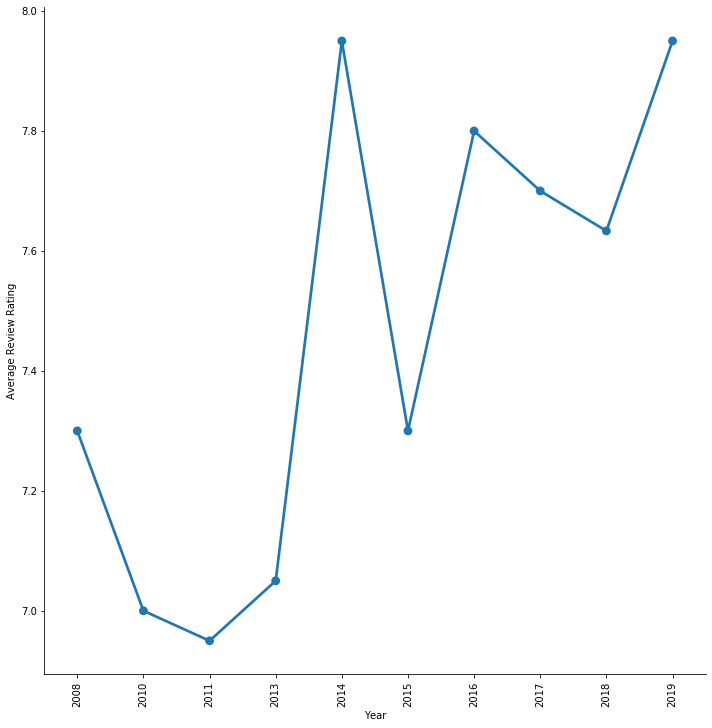

In [14]:
# what if I wanted to plot The average rating of all movies made each year? 
print(GroupByYearNew)
AvgReviewRatingsPlot=sb.catplot(x="Release Date Datetime",y="Review Rating", data=GroupByYearNew,height=10,kind="point").set_xticklabels(rotation=90).set_xlabels("Year").set_ylabels("Average Review Rating")
AvgReviewRatingsPlot
AvgReviewRatingsPlot.savefig("AverageReviewRatingsPlot")
# so the ratings for movies made from 2010 to 2013 were really low, why is that? 

In [15]:
IMDBData[["Title","Review Rating"]].sort_values("Review Rating", ascending=False)
# the top rated film is Avengers: endgame 
# in fact all of the avengers movies are the highest rated
# the original movies/all of the origin stories are lesser liked in general
# and this data doesn't have any for far from home for some reason

,Title,Review Rating
14,Avengers: Endgame (2019) - IMDb,8.8
11,Avengers: Infinity War (2018) - IMDb,8.5
23,The Avengers (2012) - IMDb,8.1
2,Guardians of the Galaxy (2014) - IMDb,8.1
7,Iron Man (2008) - IMDb,7.9
21,Thor: Ragnarok (2017) - IMDb,7.9
9,Captain America: Civil War (2016) - IMDb,7.8
18,Captain America: The Winter Soldier (2014) - IMDb,7.8
20,Guardians of the Galaxy Vol. 2 (2017) - IMDb,7.7
22,Doctor Strange (2016) - IMDb,7.5


In [16]:
IMDBData[["Title","Budget"]].sort_values("Budget", ascending=False)
# highest budget was endgame 

,Title,Budget
14,Avengers: Endgame (2019) - IMDb,"$356,000,000"
11,Avengers: Infinity War (2018) - IMDb,"$321,000,000"
9,Captain America: Civil War (2016) - IMDb,"$250,000,000"
19,Avengers: Age of Ultron (2015) - IMDb,"$250,000,000"
23,The Avengers (2012) - IMDb,"$220,000,000"
20,Guardians of the Galaxy Vol. 2 (2017) - IMDb,"$200,000,000"
1,Iron Man 2 (2010) - IMDb,"$200,000,000"
4,Iron Man 3 (2013) - IMDb,"$200,000,000"
3,Black Panther (2018) - IMDb,"$200,000,000"
21,Thor: Ragnarok (2017) - IMDb,"$180,000,000"


In [17]:
# I need to manually input the Budget for Spiderman and Captain Marvel
# IMDBData.loc[10]["Budget"]="$160,000,000  "

In [18]:
# what if I were to compare budget vs collection to see which movie lost the most money? 
# how would I calculate the amount of money lost or made? 
# collected- buget 
# BUT THEY ARE STRINGS INSTEAD OF INTEGERS??? So I would have to make a new dataframe to calculate this stuff?
# IMDBData["Revenue"]=int(IMDBData["Collection"])-int(IMDBData["Budget"])

In [19]:
# to look at revenue, I have to cast budget and collection as integers 
# and remove the $ at the beginning 
#IMDBData["Budget"]=IMDBData["Budget"].replace("nan")
#IMDBData["Budget N/A"]=IMDBData["Budget"].astype(str).apply(lambda x:x[2:13])
# these are strings, not numbers 
#IMDBData["Budget N/A"]=IMDBData["Budget N/A"].astype(float)

In [20]:
# what if I wanted to sort by release date? 
IMDBData[["Title","Release Date"]].sort_values("Release Date", ascending=False)
# this doesn't work because the release dates are not in datetime format 

,Title,Release Date
17,Thor: The Dark World (2013) - IMDb,8 November 2013 (USA)
6,Captain Marvel (2019) - IMDb,8 March 2019 (USA)
1,Iron Man 2 (2010) - IMDb,7 May 2010 (USA)
12,Spider-Man: Homecoming (2017) - IMDb,7 July 2017 (USA)
9,Captain America: Civil War (2016) - IMDb,6 May 2016 (USA)
8,Thor (2011) - IMDb,6 May 2011 (USA)
15,Ant-Man and the Wasp (2018) - IMDb,6 July 2018 (USA)
20,Guardians of the Galaxy Vol. 2 (2017) - IMDb,5 May 2017 (USA)
22,Doctor Strange (2016) - IMDb,4 November 2016 (USA)
23,The Avengers (2012) - IMDb,4 May 2012 (USA)


In [21]:
IMDBData["Release Date"][1]

# dictionaryOfMonths={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
IMDBData["Release Date Revised"]=IMDBData["Release Date"].apply(lambda x:x.split(" ")[1])

In [22]:
IMDBData["Release Date"].to_frame()
listOfReleaseDates=IMDBData["Release Date"].to_list() 
listOfTitles=IMDBData["Title"].to_list()
ReleaseDateDF = pd.DataFrame(listOfReleaseDates, columns = ['release Date'], 
                  index = listOfTitles)  

In [29]:
ReleaseDateDF


,release Date
Iron Man 2 (2010) - IMDb,7 May 2010 (USA)
Guardians of the Galaxy (2014) - IMDb,1 August 2014 (USA)
Black Panther (2018) - IMDb,16 February 2018 (USA)
Iron Man 3 (2013) - IMDb,3 May 2013 (USA)
The Incredible Hulk (2008) - IMDb,13 June 2008 (USA)
Captain Marvel (2019) - IMDb,8 March 2019 (USA)
Iron Man (2008) - IMDb,2 May 2008 (USA)
Thor (2011) - IMDb,6 May 2011 (USA)
Captain America: Civil War (2016) - IMDb,6 May 2016 (USA)
Spider-Man: Far from Home (2019) - IMDb,2 July 2019 (USA)


In [36]:
#ReleaseDateDF["day"]=[ReleaseDateDF["release Date"].apply(lambda x:x.split(" ")[0])]

In [25]:
# now I have a dataframe that has the release dates as strings 
# type(ReleaseDateDF["release Date"][2])

# SAYS THEYRE STRINGS BUT THEYRE STILL FLOATS WHEN I TRY TO USE THEM????

In [26]:
#IMDBData["Release Date Month"]=ReleaseDateDF["release Date"].apply(lambda x:x.split(" ")[1]) 
# but it still doesn't work 

In [27]:
len(IMDBData["Title"]) # 24 titles in the list

23

In [28]:
IMDBData["Title"]

1                              Iron Man 2 (2010) - IMDb
2                 Guardians of the Galaxy (2014) - IMDb
3                           Black Panther (2018) - IMDb
4                              Iron Man 3 (2013) - IMDb
5                     The Incredible Hulk (2008) - IMDb
6                          Captain Marvel (2019) - IMDb
7                                Iron Man (2008) - IMDb
8                                    Thor (2011) - IMDb
9              Captain America: Civil War (2016) - IMDb
10              Spider-Man: Far from Home (2019) - IMDb
11                 Avengers: Infinity War (2018) - IMDb
12                 Spider-Man: Homecoming (2017) - IMDb
13     Captain America: The First Avenger (2011) - IMDb
14                      Avengers: Endgame (2019) - IMDb
15                   Ant-Man and the Wasp (2018) - IMDb
16                                Ant-Man (2015) - IMDb
17                   Thor: The Dark World (2013) - IMDb
18    Captain America: The Winter Soldier (2014)